In [1]:
#### RF Theory
# 1) Ensemble learning model : in a group many DTs are trained
# 2) Ensemble Learning : Bagging and Boosting
# 3) Bagging : Bootstrap (selection with replacement) + 
#              Aggregation (mode  - classification, mean - regression)   
# 4) Bagging : parallel processing + all trees have equal weightage  
# 5) DT : prone to overfit
# 6) Can be avoided using Pruning or Ensemble learning 

# 7) RF Hyperparameters : n_estimators, criterion, max_depth, mss,msl,
#     oob_score(T/F), bootstrap(T/F)
# 8) Random Forest : is referred as Random   
#     a) Row sampling
#     b) Feature Sampling
# 9) Bagging Examples : RandomForestClassifier, BaggingClassifier    

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [3]:
df = pd.read_csv('TaxiFare.csv')
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.shape

(50000, 8)

In [5]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [6]:
df.columns = ['id','amount','date_time','lon_pickup','lat_pickup',
             'lon_drop','lat_drop','pass_count']
df.head()

,id,amount,date_time,lon_pickup,lat_pickup,lon_drop,lat_drop,pass_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


#### Handle Null Values

In [7]:
df.isnull().sum()

id            0
amount        0
date_time     0
lon_pickup    0
lat_pickup    0
lon_drop      0
lat_drop      0
pass_count    0
dtype: int64

#### Handle Duplicates

In [8]:
df.duplicated().sum()

0

#### Check data types

In [9]:
df.dtypes

id             object
amount        float64
date_time      object
lon_pickup    float64
lat_pickup    float64
lon_drop      float64
lat_drop      float64
pass_count      int64
dtype: object

In [10]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.dtypes

id                         object
amount                    float64
date_time     datetime64[ns, UTC]
lon_pickup                float64
lat_pickup                float64
lon_drop                  float64
lat_drop                  float64
pass_count                  int64
dtype: object

In [12]:
# dt - datetime
df['Year'] = df['date_time'].dt.year
df['Qtr'] = df['date_time'].dt.quarter
df['Month'] = df['date_time'].dt.month
df['Day'] = df['date_time'].dt.day
df['Hour'] = df['date_time'].dt.hour
df['WeekNum'] = df['date_time'].dt.weekday
df['WeekDay_Name'] = df['date_time'].dt.day_name()

In [13]:
df.head()

,id,amount,date_time,lon_pickup,lat_pickup,lon_drop,lat_drop,pass_count,Year,Qtr,Month,Day,Hour,WeekNum,WeekDay_Name
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,Monday
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,Tuesday
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,Thursday
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,Saturday
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,Tuesday


In [14]:
df['Is_Weekend'] = np.where(df['WeekNum'].isin([5,6]),1,0)
df.head(10)

,id,amount,date_time,lon_pickup,lat_pickup,lon_drop,lat_drop,pass_count,Year,Qtr,Month,Day,Hour,WeekNum,WeekDay_Name,Is_Weekend
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,Monday,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,Tuesday,0
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,Thursday,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,Saturday,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,Tuesday,0
5,50:45.0,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,1,6,9,3,Thursday,0
6,35:00.0,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,2012,4,11,20,20,1,Tuesday,0
7,22:00.0,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,1,4,17,2,Wednesday,0
8,10:00.0,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,2012,4,12,3,13,0,Monday,0
9,11:00.0,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2009,3,9,2,1,2,Wednesday,0


In [15]:
def compute_day_qtr(x):
    if x>0 and x<=6:
        return 1  # Early Morning/Late Night
    elif x>6 and x<=12:
        return 2  # Morning
    elif x>12 and x<=18 :
        return 3  # Afternoon/evening
    else:
        return 4  # Late evening/ night

In [16]:
df['Day_Qtr'] = df['Hour'].apply(compute_day_qtr)

In [17]:
df.head()

,id,amount,date_time,lon_pickup,lat_pickup,lon_drop,lat_drop,pass_count,Year,Qtr,Month,Day,Hour,WeekNum,WeekDay_Name,Is_Weekend,Day_Qtr
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,Monday,0,3
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,Tuesday,0,3
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,Thursday,0,4
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,Saturday,1,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,Tuesday,0,2


#### Distance formula
1) Euclidean Distance A(x1,y1), B(x2,y2) = sqrt((y2-y1)^2 + (x2-x1)^2))

2) Manhattan Distance A(x1,y1), B(x2,y2) = (|y2-y1|) + (|x2-x1|) 

3) Minkowski Distance A(x1,y1), B(x2,y2) = ((|y2-y1|)^p + (|x2-x1|)^p)^(1/p), p is an int



In [18]:
def minkowski_dist(x1,y1,x2,y2,p):
    dist = (abs(y2-y1)**p + abs(x2-x1)**p)**(1/p)
    return dist

In [19]:
df.columns

Index(['id', 'amount', 'date_time', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'pass_count', 'Year', 'Qtr', 'Month', 'Day', 'Hour',
       'WeekNum', 'WeekDay_Name', 'Is_Weekend', 'Day_Qtr'],
      dtype='object')

In [20]:
# x1,y1,x2,y2,p
df['Euclidean_Disp'] = minkowski_dist(df['lat_pickup'],df['lon_pickup'],
                                     df['lat_drop'],df['lon_drop'],2)

df['Manhattan_Disp'] = minkowski_dist(df['lat_pickup'],df['lon_pickup'],
                                     df['lat_drop'],df['lon_drop'],1)

In [21]:
df.head()

,id,amount,date_time,lon_pickup,lat_pickup,lon_drop,lat_drop,pass_count,Year,Qtr,Month,Day,Hour,WeekNum,WeekDay_Name,Is_Weekend,Day_Qtr,Euclidean_Disp,Manhattan_Disp
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,Monday,0,3,0.009436,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,Tuesday,0,3,0.079696,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,Thursday,0,4,0.013674,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,Saturday,1,1,0.025340,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,Tuesday,0,2,0.019470,0.027194


In [22]:
df['Abs_Diff_Lat'] = abs(df['lat_drop'] - df['lat_pickup'])
df['Abs_Diff_Lon'] = abs(df['lon_drop'] - df['lon_pickup'])

#### Check Inconsistent Data

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
lon_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
lat_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
lon_drop,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
lat_drop,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
pass_count,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000
Year,50000.0,2011.739260,1.862639,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
Qtr,50000.0,2.422800,1.121528,1.000000,1.000000,2.000000,3.000000,4.000000
Month,50000.0,6.273300,3.461157,1.000000,3.000000,6.000000,9.000000,12.000000
Day,50000.0,15.672040,8.660789,1.000000,8.000000,16.000000,23.000000,31.000000


In [24]:
df[['amount','pass_count']].describe()

,amount,pass_count
count,50000.000000,50000.000000
mean,11.364171,1.667840
std,9.685557,1.289195
min,-5.000000,0.000000
25%,6.000000,1.000000
50%,8.500000,1.000000
75%,12.500000,2.000000
max,200.000000,6.000000


In [25]:
print(df[df['amount']<=0].shape)
print(df[df['pass_count']==0].shape)

(9, 21)
(165, 21)


In [26]:
df = df[(df['amount']>0) & (df['pass_count']>0)]
df.shape

(49826, 21)

#### Note : 
1) Latitude ranges from  -90 to 90.<br>
2) Longitude ranges from -180 to 180.

In [27]:
print(df[(df['lat_pickup']<-90) | (df['lat_pickup']>90)].shape)
print(df[(df['lat_drop']<-90) | (df['lat_drop']>90)].shape)

(1, 21)
(0, 21)


In [28]:
print(df[(df['lon_pickup']<-180) | (df['lon_pickup']>180)].shape)
print(df[(df['lon_drop']<-180) | (df['lon_drop']>180)].shape)

(0, 21)
(0, 21)


In [29]:
df = df[(df['lat_pickup']>=-90) & ((df['lat_pickup']<=90))]
df.shape

(49825, 21)

In [32]:
# def haversine_dist(lon1, lat1, lon2, lat2):
#     lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
#     dlon = lon2 - lon1
#     dlat = lat2 - lat1
#     a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
#     c = 2*np.arctan(np.sqrt(a),np.sqrt(1-a))
#     km = 6378 * c    # radius of earth = 6378km
#     return km

In [33]:
# df['Haversine_dist'] = haversine_dist(df['lon_pickup'],df['lat_pickup'],
#                                      df['lon_drop'],df['lat_drop'])

In [34]:
df.isnull().sum()

id                0
amount            0
date_time         0
lon_pickup        0
lat_pickup        0
lon_drop          0
lat_drop          0
pass_count        0
Year              0
Qtr               0
Month             0
Day               0
Hour              0
WeekNum           0
WeekDay_Name      0
Is_Weekend        0
Day_Qtr           0
Euclidean_Disp    0
Manhattan_Disp    0
Abs_Diff_Lat      0
Abs_Diff_Lon      0
dtype: int64

In [35]:
df.describe()

,amount,lon_pickup,lat_pickup,lon_drop,lat_drop,pass_count,Year,Qtr,Month,Day,Hour,WeekNum,Is_Weekend,Day_Qtr,Euclidean_Disp,Manhattan_Disp,Abs_Diff_Lat,Abs_Diff_Lon
count,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000
mean,11.373212,-72.510557,39.926937,-72.506896,39.927448,1.673437,2011.740151,2.423663,6.275946,15.671631,13.487807,3.029945,0.283051,2.825730,0.176089,0.231213,0.086736,0.144477
std,9.693602,10.391455,6.011390,10.400148,6.011808,1.287799,1.865203,1.121367,3.460644,8.660797,6.508598,1.957200,0.450485,1.002384,3.407818,4.535125,1.631282,2.992449
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000,2010.000000,1.000000,3.000000,8.000000,9.000000,1.000000,0.000000,2.000000,0.012471,0.015917,0.006602,0.005777
50%,8.500000,-73.981838,40.752685,-73.980087,40.753375,1.000000,2012.000000,2.000000,6.000000,16.000000,14.000000,3.000000,0.000000,3.000000,0.021502,0.027637,0.013930,0.012525
75%,12.500000,-73.967145,40.767363,-73.963620,40.768162,2.000000,2013.000000,3.000000,9.000000,23.000000,19.000000,5.000000,1.000000,4.000000,0.038676,0.050872,0.027087,0.023974
max,200.000000,40.783472,43.098708,40.851027,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000,4.000000,84.480944,114.767235,43.020333,74.014917


In [37]:
print(df[df['Euclidean_Disp']==0].shape)
print(df[df['Manhattan_Disp']==0].shape)
print(df[df['Abs_Diff_Lat']==0].shape)
print(df[df['Abs_Diff_Lon']==0].shape)

(1446, 21)
(1446, 21)
(1457, 21)
(1461, 21)


In [38]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [39]:
lat_pair = [df['lat_pickup'].iloc[0],df['lat_drop'].iloc[0]]
lon_pair = [df['lon_pickup'].iloc[0],df['lon_drop'].iloc[0]]
lat_pair_rad = [radians(_) for _ in lat_pair]
print(lat_pair_rad)
lon_pair_rad = [radians(_) for _ in lon_pair]
result = (haversine_distances([lat_pair_rad, lon_pair_rad])*6371)[0][1]
result

[0.7107210923049249, 0.710563297087252]


15075.997667862339

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html

In [40]:
# Compute Arc Distance
def generate_haversine():
    hav_dis = []
    for i in range(len(df)):
        lat_pair_r = [radians(df['lat_pickup'].iloc[i]),
                    radians(df['lon_pickup'].iloc[i])]
        lon_pair_r = [radians(df['lat_drop'].iloc[i]),
                    radians(df['lon_drop'].iloc[i])]
        res = (haversine_distances([lat_pair_r, lon_pair_r])*6371)[0][1]
        hav_dis.append(res)
    return hav_dis

In [41]:
hav_dis = generate_haversine()
print(len(hav_dis))

49825


In [42]:
hav_dis

[1.030763935049508,
 8.450133595805992,
 1.3895252257697308,
 2.799270239983641,
 1.9991567879963377,
 3.7872390847819912,
 1.5558066593500526,
 4.155444291845812,
 1.253231512725298,
 2.8496267961070503,
 1.374576999593841,
 0.0,
 0.7177674874531167,
 2.0193838271979137,
 1.6714445980753232,
 0.0,
 2.609774493745362,
 1.5119042477189057,
 0.9219517182545394,
 0.39917857039885574,
 1.6868613301697526,
 2.2924697999176953,
 0.9242957326389409,
 1.4039581786018265,
 1.0177730882278786,
 2.531946697193182,
 0.0,
 0.3287708526843157,
 4.0734630904871665,
 0.8081531607887177,
 0.8719132689989956,
 6.7035516761118155,
 9.403295658389684,
 1.381588506597531,
 7.150502806160692,
 12.782055750141017,
 0.806699283426312,
 0.9518008399110728,
 2.3438024765581496,
 3.585990714379401,
 1.6435680593534319,
 5.013935827376097,
 5.7482588406091795,
 5.45687047329047,
 0.9470360672686319,
 2.548615186304444,
 0.9927377363024056,
 0.46185347052060766,
 0.5503272397653778,
 1.6478832232050487,
 2.4993156

In [43]:
r1 = [i for i in hav_dis if i==0]
len(r1)

1446

In [44]:
df.columns

Index(['id', 'amount', 'date_time', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'pass_count', 'Year', 'Qtr', 'Month', 'Day', 'Hour',
       'WeekNum', 'WeekDay_Name', 'Is_Weekend', 'Day_Qtr', 'Euclidean_Disp',
       'Manhattan_Disp', 'Abs_Diff_Lat', 'Abs_Diff_Lon'],
      dtype='object')

In [45]:
df['Haversine_dist'] = hav_dis

In [ ]:
#### pandas, folium, geopandas, plotly, geopy

In [47]:
from folium import Marker
import folium

#### Plot Map

In [50]:
# folium.Map([lat,long],tiles=)
map1 = folium.Map([40.758470,-73.972690], tiles='openstreetmap', 
                  zoom_start=10)
map1

### Plotting Outliers 

In [51]:
# df.columns
a1 = df[['lat_pickup','lon_pickup','lat_drop',
     'lon_drop']].describe(percentiles=[0.01,0.02,0.03,
                                       0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
lat_pickup,-74.006893,0.000000,40.583785,40.645444,40.702190,40.752685,40.787791,40.794314,40.799559,40.807074,43.098708
lon_pickup,-75.423848,-74.014445,-74.010464,-74.008736,-74.006819,-73.981838,-73.871363,-73.786896,-73.239712,0.000000,40.783472
lat_drop,-74.006377,0.000000,40.572868,40.646899,40.686191,40.753375,40.794042,40.804067,40.810229,40.832378,43.415190
lon_drop,-84.654241,-74.015120,-74.011760,-74.009839,-74.007273,-73.980087,-73.873373,-73.802166,-73.474126,0.000000,40.851027


In [53]:
outliers = df[(df['lat_pickup']<40.583785) | (df['lon_pickup']>-73.239712) |
             (df['lat_drop']<40.572868) | (df['lon_drop']>-73.474126)]
outliers.shape

(1082, 22)

In [63]:
outliers.sample(10)

,id,amount,date_time,lon_pickup,lat_pickup,lon_drop,lat_drop,pass_count,Year,Qtr,...,Hour,WeekNum,WeekDay_Name,Is_Weekend,Day_Qtr,Euclidean_Disp,Manhattan_Disp,Abs_Diff_Lat,Abs_Diff_Lon,Haversine_dist
4567,52:00.0,10.1,2010-01-07 11:52:00+00:00,-73.989795,40.715727,-73.99654,40.484335,1,2010,1,...,11,3,Thursday,0,2,0.231490,0.238137,0.231392,0.006745,25.735917
37467,23:00.0,89.9,2012-12-24 12:23:00+00:00,-73.983757,40.761047,-74.15489,40.564610,5,2012,4,...,12,0,Monday,0,2,0.260526,0.367570,0.196437,0.171133,26.181425
36680,33:27.0,31.5,2013-09-27 05:33:27+00:00,0.000000,0.000000,0.00000,0.000000,3,2013,3,...,5,4,Friday,0,1,0.000000,0.000000,0.000000,0.000000,0.000000
18511,39:00.0,5.5,2013-11-16 21:39:00+00:00,0.000000,0.000000,0.00000,0.000000,2,2013,4,...,21,5,Saturday,1,4,0.000000,0.000000,0.000000,0.000000,0.000000
43439,28:00.0,5.3,2010-07-30 19:28:00+00:00,0.000000,0.000000,0.00000,0.000000,3,2010,3,...,19,4,Friday,0,4,0.000000,0.000000,0.000000,0.000000,0.000000
28359,18:36.0,20.0,2014-12-05 22:18:36+00:00,0.000000,0.000000,0.00000,0.000000,1,2014,4,...,22,4,Friday,0,4,0.000000,0.000000,0.000000,0.000000,0.000000
25511,23:00.0,6.5,2014-04-20 14:23:00+00:00,0.000000,0.000000,0.00000,0.000000,1,2014,2,...,14,6,Sunday,1,3,0.000000,0.000000,0.000000,0.000000,0.000000
12882,37:00.0,30.5,2012-05-26 06:37:00+00:00,0.000000,0.000000,0.00000,0.000000,1,2012,2,...,6,5,Saturday,1,1,0.000000,0.000000,0.000000,0.000000,0.000000
46100,54:00.0,10.0,2013-12-11 05:54:00+00:00,0.000000,0.000000,0.00000,0.000000,5,2013,4,...,5,2,Wednesday,0,1,0.000000,0.000000,0.000000,0.000000,0.000000
2143,39:00.0,6.5,2009-01-09 08:39:00+00:00,0.000000,0.000000,0.00000,0.000000,1,2009,1,...,8,4,Friday,0,2,0.000000,0.000000,0.000000,0.000000,0.000000


In [66]:
outliers_map = folium.Map([40.76,-73.98],tiles='openstreetmap', 
                  zoom_start=10)
outliers_map

In [67]:
lat1 = list(outliers["lat_pickup"])
lon1 = list(outliers["lon_pickup"])
lat2 = list(outliers["lat_drop"])
lon2 = list(outliers["lon_drop"])

for lt1,ln1,lt2,ln2 in zip(lat1,lon1,lat2,lon2):
    folium.Marker(location = [lt1,ln1],tooltip = str(lt1) +","+str(ln1),
              icon = folium.Icon(color = 'gray')).add_to(outliers_map)

outliers_map

#### Idenifying Rides and Drop Locations

In [68]:
pickup_map = folium.Map([40.758470,-73.972690], tiles='openstreetmap', 
                  zoom_start=10)

In [69]:
df200 = df.head(200)

In [70]:
lat1 = list(df200["lat_pickup"])
lon1 = list(df200["lon_pickup"])
lat2 = list(df200["lat_drop"])
lon2 = list(df200["lon_drop"])

for lt1,ln1,lt2,ln2 in zip(lat1,lon1,lat2,lon2):
    folium.Marker(location = [lt1,ln1],tooltip = str(lt1) +","+str(ln1),
              icon = folium.Icon(color = 'red')).add_to(pickup_map)

pickup_map

In [71]:
for lt1,ln1,lt2,ln2 in zip(lat1,lon1,lat2,lon2):
    folium.Marker(location = [lt2,ln2],tooltip = str(lt2) +","+str(ln2),
              icon = folium.Icon(color = 'black')).add_to(pickup_map)

pickup_map

#### Outlier Treatment in Coordinates

In [72]:
a1 = df[['lat_pickup','lon_pickup','lat_drop',
    'lon_drop']].describe(percentiles=[0.01,0.02,0.03,
                                       0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
lat_pickup,-74.006893,0.000000,40.583785,40.645444,40.702190,40.752685,40.787791,40.794314,40.799559,40.807074,43.098708
lon_pickup,-75.423848,-74.014445,-74.010464,-74.008736,-74.006819,-73.981838,-73.871363,-73.786896,-73.239712,0.000000,40.783472
lat_drop,-74.006377,0.000000,40.572868,40.646899,40.686191,40.753375,40.794042,40.804067,40.810229,40.832378,43.415190
lon_drop,-84.654241,-74.015120,-74.011760,-74.009839,-74.007273,-73.980087,-73.873373,-73.802166,-73.474126,0.000000,40.851027


In [73]:
print(df[df['lat_pickup']<40.583785].shape)
print(df[df['lon_pickup']>-73.239712].shape)
print(df[df['lat_drop']<40.572868].shape)
print(df[df['lon_drop']>-73.474126].shape)

(997, 22)
(997, 22)
(997, 22)
(997, 22)


In [74]:
df1 = df.copy()

In [75]:
df['lat_pickup'] = np.where(df['lat_pickup']<40.583785,40.583785,
                            df['lat_pickup'])
df['lon_pickup'] = np.where(df['lon_pickup']>-73.239712,-73.239712,
                            df['lon_pickup']) 
df['lat_drop'] = np.where(df['lat_drop']<40.572868,40.572868,
                            df['lat_drop'])
df['lon_drop'] = np.where(df['lon_drop']>-73.474126,-73.474126,
                            df['lon_drop'])

In [76]:
a1 = df[['lat_pickup','lon_pickup','lat_drop',
    'lon_drop']].describe(percentiles=[0.01,0.02,0.03,
                                       0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
lat_pickup,40.583785,40.583785,40.585624,40.645444,40.702190,40.752685,40.787791,40.794314,40.799559,40.807074,43.098708
lon_pickup,-75.423848,-74.014445,-74.010464,-74.008736,-74.006819,-73.981838,-73.871363,-73.786896,-73.292918,-73.239712,-73.239712
lat_drop,40.572868,40.572868,40.573724,40.646899,40.686191,40.753375,40.794042,40.804067,40.810229,40.832378,43.415190
lon_drop,-84.654241,-74.015120,-74.011760,-74.009839,-74.007273,-73.980087,-73.873373,-73.802166,-73.493118,-73.474126,-73.474126


In [77]:
df['amount'].describe()

count    49825.000000
mean        11.373212
std          9.693602
min          0.010000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [78]:
df.sample(5)
#(-73.972690 	40.758470) 	 (-73.992411 	40.689156)

,id,amount,date_time,lon_pickup,lat_pickup,lon_drop,lat_drop,pass_count,Year,Qtr,...,Hour,WeekNum,WeekDay_Name,Is_Weekend,Day_Qtr,Euclidean_Disp,Manhattan_Disp,Abs_Diff_Lat,Abs_Diff_Lon,Haversine_dist
45822,52:41.0,7.7,2010-02-13 18:52:41+00:00,-73.962870,40.761652,-73.980657,40.783113,1,2010,1,...,18,5,Saturday,1,3,0.027874,0.039248,0.021461,0.017787,2.817476
29944,48:58.0,4.5,2012-09-11 13:48:58+00:00,-73.989192,40.741614,-73.997596,40.735043,1,2012,3,...,13,1,Tuesday,0,3,0.010668,0.014975,0.006571,0.008404,1.017452
13304,28:00.0,7.3,2009-11-23 03:28:00+00:00,-73.239712,40.583785,-73.474126,40.572868,5,2009,4,...,3,0,Monday,0,1,0.000000,0.000000,0.000000,0.000000,0.000000
23123,42:00.0,9.5,2013-05-03 17:42:00+00:00,-74.001010,40.729120,-74.001790,40.719497,3,2013,2,...,17,4,Friday,0,3,0.009655,0.010403,0.009623,0.000780,1.072046
6492,14:00.0,4.1,2012-01-21 09:14:00+00:00,-73.984897,40.759050,-73.991165,40.750207,1,2012,1,...,9,5,Saturday,1,2,0.010839,0.015111,0.008843,0.006268,1.116072


In [79]:
def feature_desc_wrt_amount(feat):
    feat_desc = df.groupby([feat])['amount'].agg(['min','max','mean',
                                                  'median','count'])
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=df[feat],
                  order=df[feat].value_counts().sort_values(ascending=False).index)
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {feat}')
    plt.xticks(fontsize=8)
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[feat],y=df['amount'])
    plt.title(f'Boxplot for Amount wrt {feat}')
    return feat_desc 

In [80]:
df.columns

Index(['id', 'amount', 'date_time', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'pass_count', 'Year', 'Qtr', 'Month', 'Day', 'Hour',
       'WeekNum', 'WeekDay_Name', 'Is_Weekend', 'Day_Qtr', 'Euclidean_Disp',
       'Manhattan_Disp', 'Abs_Diff_Lat', 'Abs_Diff_Lon', 'Haversine_dist'],
      dtype='object')

In [ ]:
# EDA
# Yr wrt Amount
# Qtr wrt Amount
# Month
# Day
# Hr
# Is_Weekend
# Day_Qtr
# Pass_Count

# Amount,Euclidean_Disp,'Manhattan_Disp', 'Haversine_dist' - 
# Outlier Treatment

# Feature Selection : 
#  X 
# 'pass_count', 'Year', 'Qtr', 'Month', 'Day', 'Hour',
# 'WeekNum', 'Is_Weekend', 'Day_Qtr', 'Euclidean_Disp',
# 'Manhattan_Disp', 'Abs_Diff_Lat', 'Abs_Diff_Lon', 'Haversine_dist'

# OLS, LinReg, Ridge, Lasso, 
# DTReg, RFReg : model does not generate coefficients
# R2 is not used : DTReg, RFReg - criterion: gini and entropy is not used

# RF - Feature Importance

# Hyperparameter Tuning

,min,max,mean,median,count
Year,,,,,
2009,2.50,165.00,10.049168,7.7,7716
2010,2.50,143.00,10.141539,7.7,7643
2011,2.50,96.00,10.481042,7.7,7729
2012,2.50,200.00,11.244782,8.5,7944
2013,2.50,180.00,12.443361,9.5,7817
2014,2.50,165.00,13.140996,9.5,7529
2015,0.01,96.25,13.076379,9.5,3447


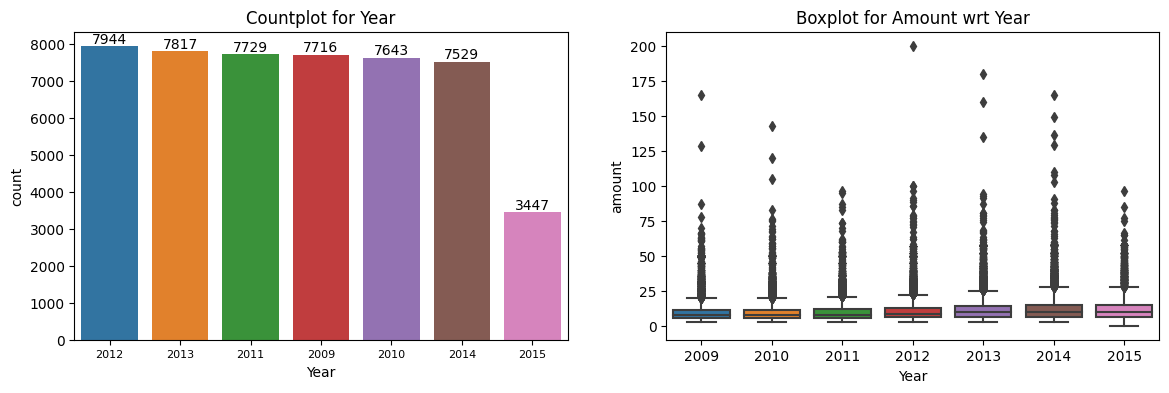

In [81]:
feature_desc_wrt_amount('Year')

,min,max,mean,median,count
Qtr,,,,,
1,2.50,200.0,10.920603,8.1,13452
2,0.01,160.0,11.557994,8.5,13603
3,2.50,165.0,11.426571,8.5,10979
4,2.50,165.0,11.626716,8.5,11791


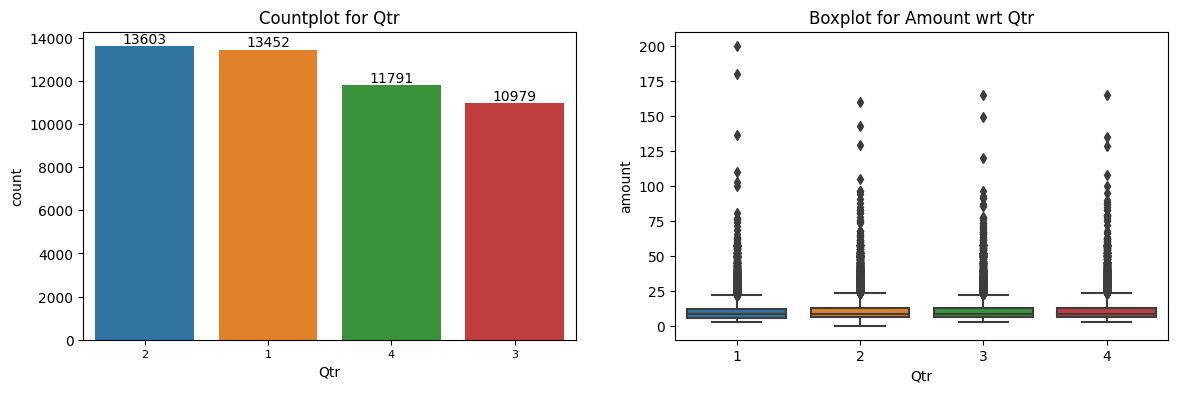

In [82]:
feature_desc_wrt_amount('Qtr')

,min,max,mean,median,count
Month,,,,,
1,2.50,180.00,10.702835,8.0,4525
2,2.50,200.00,10.940168,8.1,4282
3,2.50,80.50,11.114708,8.1,4645
4,2.50,93.75,11.330644,8.5,4501
5,0.01,160.00,11.876678,8.9,4597
6,2.50,96.25,11.459949,8.5,4505
7,2.50,120.00,10.947730,8.1,3643
8,2.50,165.00,11.332315,8.5,3533
9,2.50,96.00,11.972829,8.9,3803


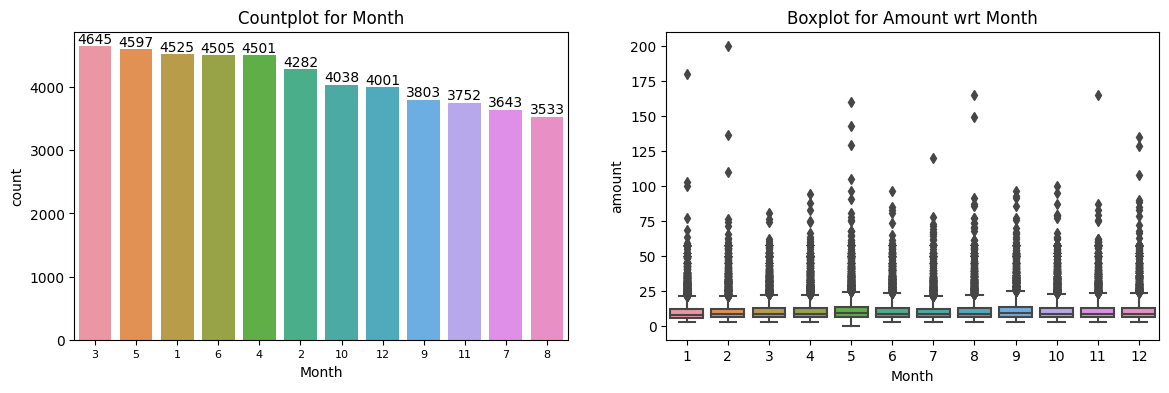

In [83]:
feature_desc_wrt_amount('Month')

,min,max,mean,median,count
Day,,,,,
1,0.01,165.00,11.297063,8.5,1522
2,2.50,61.10,10.944016,8.5,1611
3,2.50,128.61,11.340560,8.1,1572
4,2.50,90.50,11.246569,8.1,1498
5,2.50,96.25,11.529210,8.5,1594
6,2.50,78.60,11.319050,8.5,1664
7,2.50,165.00,11.684889,8.5,1706
8,2.50,75.00,11.529883,8.5,1709
9,2.50,143.00,11.399481,8.1,1675


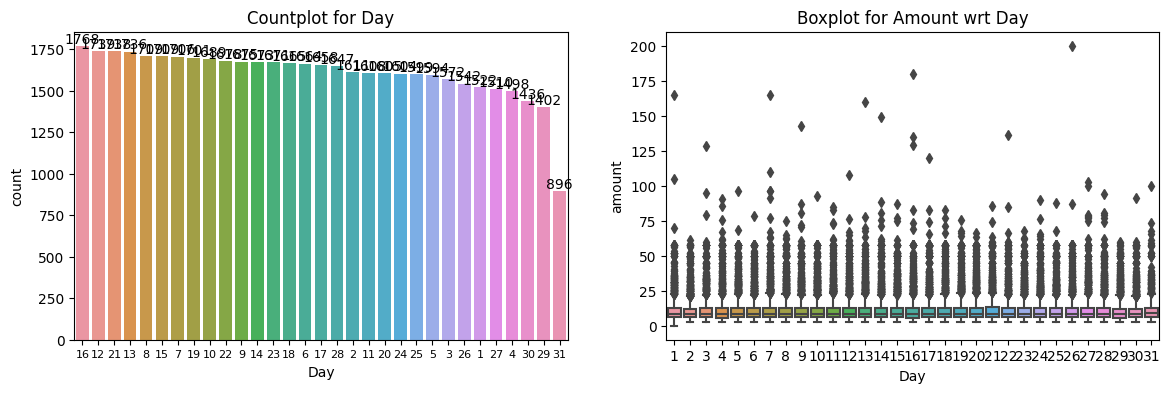

In [84]:
feature_desc_wrt_amount('Day')

,min,max,mean,median,count
Hour,,,,,
0,2.50,88.25,11.925651,9.3,1888
1,2.50,128.83,11.725847,9.0,1481
2,2.50,136.00,11.253579,8.9,1084
3,2.50,200.00,12.082432,8.9,843
4,2.50,80.35,13.748651,10.0,608
5,2.50,82.50,15.407743,9.3,505
6,2.50,78.50,12.286443,7.7,1015
7,2.50,87.00,11.129984,8.0,1896
8,2.50,95.00,10.624627,8.1,2200


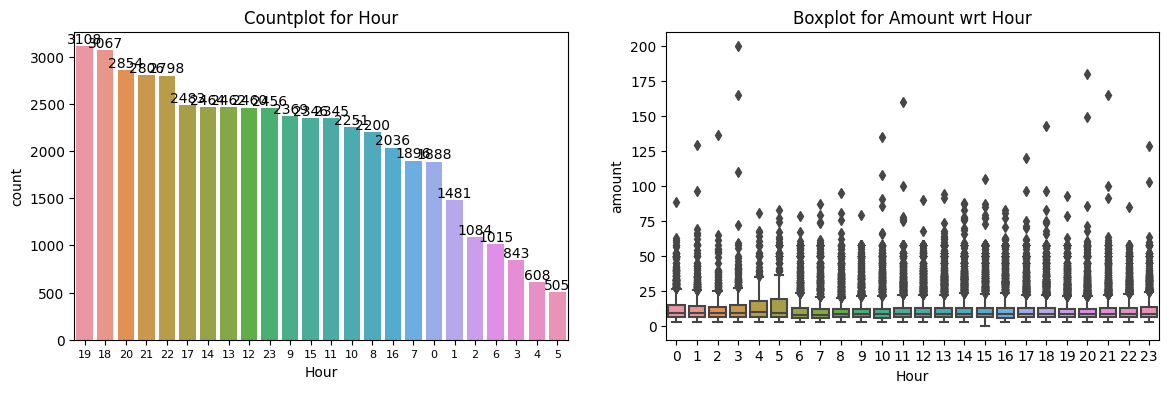

In [85]:
feature_desc_wrt_amount('Hour')

,min,max,mean,median,count
Day_Qtr,,,,,
1,2.50,200.0,12.348479,8.9,5536
2,2.50,160.0,10.926423,8.1,13521
3,0.01,143.0,11.721277,8.5,14858
4,2.50,180.0,11.088510,8.5,15910


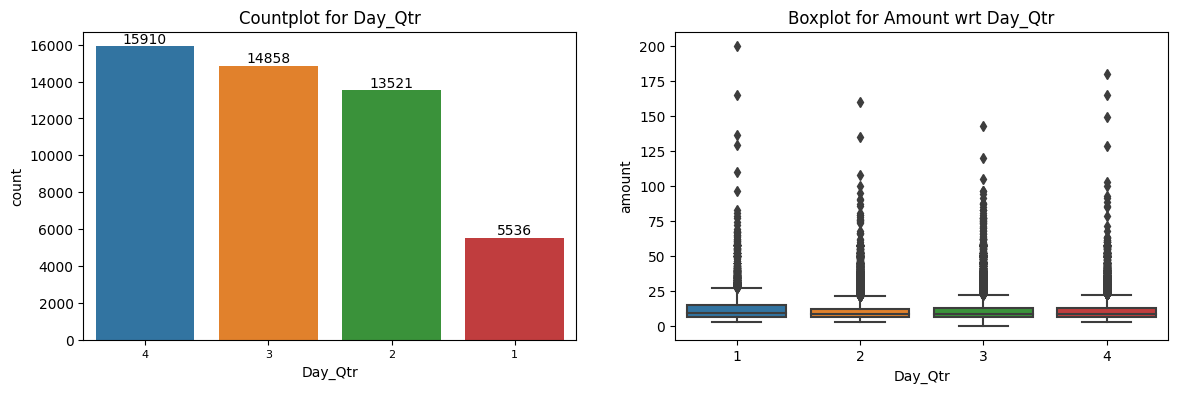

In [86]:
feature_desc_wrt_amount('Day_Qtr')

,min,max,mean,median,count
Is_Weekend,,,,,
0,0.01,180.0,11.390267,8.5,35722
1,2.50,200.0,11.330013,8.5,14103


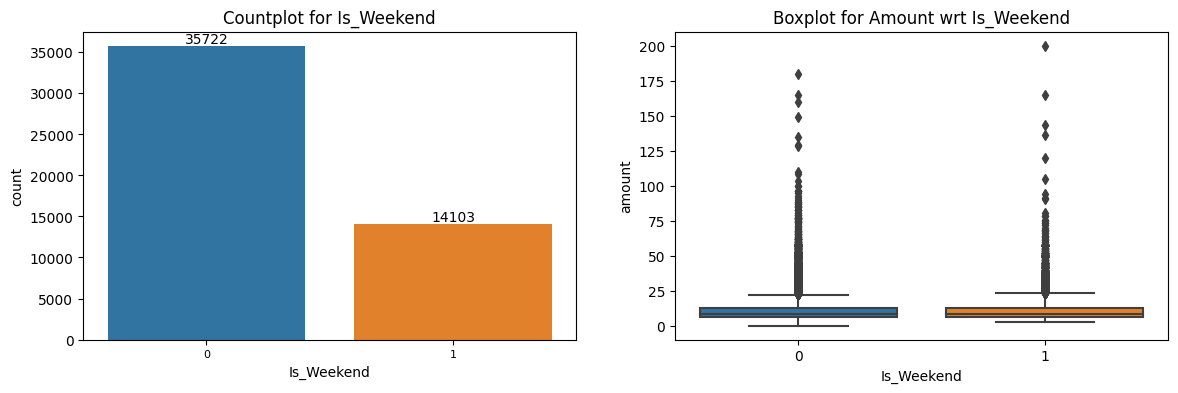

In [87]:
feature_desc_wrt_amount('Is_Weekend')

In [88]:
#### Correlation

#### Outlier Treatment in Amount and Distances

In [89]:
df.columns

Index(['id', 'amount', 'date_time', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'pass_count', 'Year', 'Qtr', 'Month', 'Day', 'Hour',
       'WeekNum', 'WeekDay_Name', 'Is_Weekend', 'Day_Qtr', 'Euclidean_Disp',
       'Manhattan_Disp', 'Abs_Diff_Lat', 'Abs_Diff_Lon', 'Haversine_dist'],
      dtype='object')

In [90]:
cols = ['amount','Euclidean_Disp',
       'Manhattan_Disp', 'Abs_Diff_Lat', 'Abs_Diff_Lon', 'Haversine_dist']

a3 = df[cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a3 = a3.iloc[:,3:]
a3

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
amount,0.01,3.3,3.5,3.700000,4.100000,8.500000,30.500000,38.330000,46.815600,52.000000,200.000000
Euclidean_Disp,0.00,0.0,0.0,0.000016,0.004366,0.021502,0.112349,0.142110,0.194795,0.228067,84.480944
Manhattan_Disp,0.00,0.0,0.0,0.000022,0.005447,0.027637,0.133446,0.184516,0.244402,0.306251,114.767235
Abs_Diff_Lat,0.00,0.0,0.0,0.000006,0.000607,0.013930,0.065356,0.084639,0.101346,0.120212,43.020333
Abs_Diff_Lon,0.00,0.0,0.0,0.000006,0.000455,0.012525,0.099732,0.124693,0.167313,0.199881,74.014917
Haversine_dist,0.00,0.0,0.0,0.001681,0.429058,2.120017,10.123040,13.548984,17.642806,20.754366,8667.818812


In [95]:
print(df[df['amount']>52].shape)
print(df[df['Euclidean_Disp']>0.228067].shape)
print(df[df['Manhattan_Disp']>0.306251].shape)

(498, 22)
(499, 22)
(499, 22)


In [96]:
def outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.03))
    return x

In [97]:
df2 = df.copy()

In [98]:
cols1 = ['Euclidean_Disp','Manhattan_Disp', 'Abs_Diff_Lat', 'Abs_Diff_Lon', 'Haversine_dist'] 
df[cols1] = df[cols1].apply(outlier_treatment)

In [99]:
cols = ['amount','Euclidean_Disp',
       'Manhattan_Disp', 'Abs_Diff_Lat', 'Abs_Diff_Lon', 'Haversine_dist']

a3 = df[cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a3 = a3.iloc[:,3:]
a3

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
amount,0.010000,3.300000,3.500000,3.700000,4.100000,8.500000,30.500000,38.330000,46.815600,52.000000,200.000000
Euclidean_Disp,0.000016,0.000016,0.000016,0.000016,0.004366,0.021502,0.112349,0.142110,0.194795,0.228059,0.228067
Manhattan_Disp,0.000022,0.000022,0.000022,0.000022,0.005447,0.027637,0.133446,0.184516,0.244402,0.306247,0.306251
Abs_Diff_Lat,0.000006,0.000006,0.000006,0.000006,0.000607,0.013930,0.065356,0.084639,0.101346,0.120195,0.120212
Abs_Diff_Lon,0.000006,0.000006,0.000006,0.000006,0.000455,0.012525,0.099732,0.124693,0.167313,0.199857,0.199881
Haversine_dist,0.001681,0.001681,0.001681,0.001685,0.429058,2.120017,10.123040,13.548984,17.642806,20.753484,20.754366


In [100]:
df['amount'] = np.where(df['amount']<3.3,3.3,df['amount'])
df['amount'] = np.where(df['amount']>52,52,df['amount'])

In [101]:
cols = ['amount','Euclidean_Disp',
       'Manhattan_Disp', 'Abs_Diff_Lat', 'Abs_Diff_Lon', 'Haversine_dist']

a3 = df[cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a3 = a3.iloc[:,3:]
a3

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
amount,3.300000,3.300000,3.500000,3.700000,4.100000,8.500000,30.500000,38.330000,46.815600,52.000000,52.000000
Euclidean_Disp,0.000016,0.000016,0.000016,0.000016,0.004366,0.021502,0.112349,0.142110,0.194795,0.228059,0.228067
Manhattan_Disp,0.000022,0.000022,0.000022,0.000022,0.005447,0.027637,0.133446,0.184516,0.244402,0.306247,0.306251
Abs_Diff_Lat,0.000006,0.000006,0.000006,0.000006,0.000607,0.013930,0.065356,0.084639,0.101346,0.120195,0.120212
Abs_Diff_Lon,0.000006,0.000006,0.000006,0.000006,0.000455,0.012525,0.099732,0.124693,0.167313,0.199857,0.199881
Haversine_dist,0.001681,0.001681,0.001681,0.001685,0.429058,2.120017,10.123040,13.548984,17.642806,20.753484,20.754366


#### Select x and y

In [102]:
df.columns

Index(['id', 'amount', 'date_time', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'pass_count', 'Year', 'Qtr', 'Month', 'Day', 'Hour',
       'WeekNum', 'WeekDay_Name', 'Is_Weekend', 'Day_Qtr', 'Euclidean_Disp',
       'Manhattan_Disp', 'Abs_Diff_Lat', 'Abs_Diff_Lon', 'Haversine_dist'],
      dtype='object')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


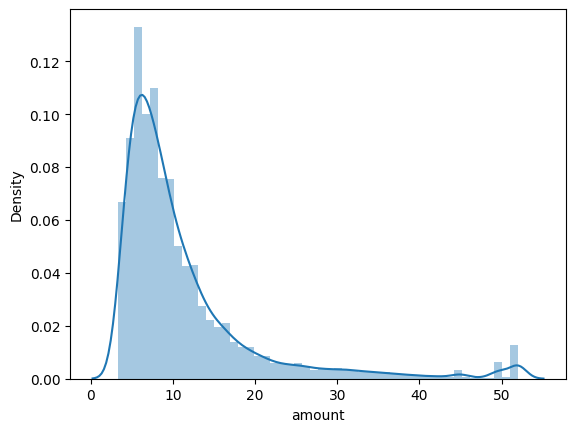

In [119]:
sns.distplot(df['amount'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


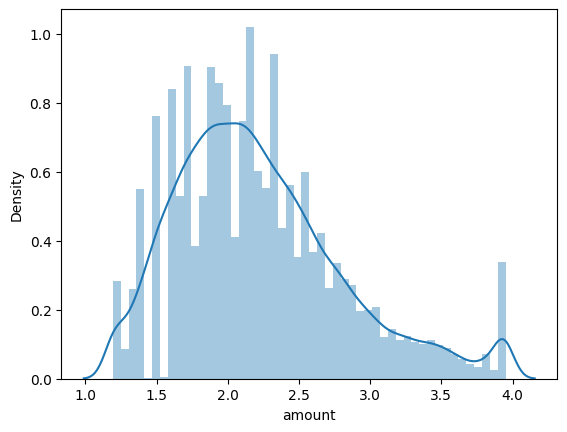

In [120]:
sns.distplot(np.log(df['amount']))
plt.show()

In [121]:
x = df[['pass_count', 'Year', 'Qtr', 'Month', 'Day', 'Hour',
        'Is_Weekend', 'Day_Qtr', 'Euclidean_Disp',
       'Manhattan_Disp', 'Abs_Diff_Lat', 'Abs_Diff_Lon', 'Haversine_dist']]
y = np.log(df['amount'])
print(x.shape)
print(y.shape)

(49825, 13)
(49825,)


#### Split data into train and test

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34877, 13)
(14948, 13)
(34877,)
(14948,)


In [106]:
x_train.dtypes

pass_count          int64
Year                int64
Qtr                 int64
Month               int64
Day                 int64
Hour                int64
Is_Weekend          int32
Day_Qtr             int64
Euclidean_Disp    float64
Manhattan_Disp    float64
Abs_Diff_Lat      float64
Abs_Diff_Lon      float64
Haversine_dist    float64
dtype: object

In [124]:
from sklearn.metrics import *

In [139]:
def eval_model(model,x_train,x_test,y_train,y_test,modelname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
   
    ypred_train = model.predict(x_train)
    train_mse = mean_squared_error(y_train, ypred_train) 
    
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
                        'Train_MSE':train_mse,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse},index=[modelname])
    return res, ypred

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### 1) LinReg ( target is set to log scale)

In [140]:
lr1 = LinearRegression()
lr1_res, ypred_lr1 = eval_model(lr1,x_train, x_test, y_train, y_test, 'LinReg')
lr1_res

,Train_R2,Test_R2,Test_MAE,Train_MSE,Test_MSE,Test_RMSE
LinReg,0.662348,0.637734,0.250457,0.118414,0.127807,0.357501


In [141]:
y1 = df['amount']
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y1,test_size=0.3,random_state=42)

#### DT Reg

In [142]:
dt1 = DecisionTreeRegressor(max_depth=8,min_samples_split=15)
dt1_res,ypred_dt1 = eval_model(dt1,x_train1,x_test1,y_train1,y_test1,'DTree')
dt1_res

,Train_R2,Test_R2,Test_MAE,Train_MSE,Test_MSE,Test_RMSE
DTree,0.830989,0.779856,2.175194,13.53384,18.02522,4.245612


#### RandomForest Regressor

In [143]:
rf1 = RandomForestRegressor(n_estimators=80,max_depth=8,min_samples_split=15)
rf1_res,ypred_rf1 = eval_model(rf1,x_train1,x_test1,y_train1,y_test1,'RForest')
rf1_res

,Train_R2,Test_R2,Test_MAE,Train_MSE,Test_MSE,Test_RMSE
RForest,0.842118,0.796061,2.109437,12.642726,16.698301,4.086355


#### Feature Importance

In [144]:
rf_base = RandomForestRegressor()
rf_base.fit(x_train1,y_train1)

fimp = pd.DataFrame({'Feature':x_train1.columns,'FImp':rf_base.feature_importances_})
fimp = fimp.sort_values('FImp',ascending=False)
fimp

,Feature,FImp
8,Euclidean_Disp,0.742661
11,Abs_Diff_Lon,0.047163
12,Haversine_dist,0.030483
1,Year,0.030410
10,Abs_Diff_Lat,0.027932
5,Hour,0.027796
4,Day,0.027744
9,Manhattan_Disp,0.023488
3,Month,0.018394
0,pass_count,0.008307


#### Model with Most Imp Features

In [153]:
sig_feat = fimp['Feature'][fimp['FImp']>0.025].values
sig_feat

array(['Euclidean_Disp', 'Abs_Diff_Lon', 'Haversine_dist', 'Year',
       'Abs_Diff_Lat', 'Hour', 'Day'], dtype=object)

In [154]:
x2 = x[sig_feat]
y2 = df['amount']
print(x2.shape)
print(y2.shape)

(49825, 7)
(49825,)


In [155]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.3,
                                                     random_state=42)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(34877, 7)
(14948, 7)
(34877,)
(14948,)


In [156]:
rf2 = RandomForestRegressor(n_estimators=80,max_depth=8,min_samples_split=15)
rf2_res,ypred_rf2 = eval_model(rf2,x_train2,x_test2,y_train2,y_test2,'RForest2')
rf2_res

,Train_R2,Test_R2,Test_MAE,Train_MSE,Test_MSE,Test_RMSE
RForest2,0.839722,0.7941,2.115596,12.834534,16.858868,4.105955


#### Hyperparameter Tuning

In [157]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [158]:
hparams_rf = {'n_estimators':[60,70,80,90,100,120,150],
              'max_depth':[6,7,8,9,10,12,15],
              'min_samples_split':[8,10,12,15,20]}

print(7*7*5)

245


In [ ]:
rf_base1 = RandomForestRegressor()
rs1 = RandomizedSearchCV(rf_base1,param_distributions=hparams_rf,cv=5,
                        scoring='neg_mean_squared_error')
rs1.fit(x_train2,y_train2)

In [ ]:
print(rs1.best_score_)
print(rs1.best_params_)

In [ ]:
# Non-Linear Models : DT, RF, KNNReg => R2 should not be used as a performance metric.
# These Models dont generate coefficients and intercepts. 
# Rather MSE or  RMSE is used.

# Time_Series Models : R2 should not be used as a performance metric.
# Rather MSE or RMSE or MAPE (Mean Absoulte Percentage Error) is used.

In [ ]:
# Overfit : Good Train Score, Poor test Score
# case 1 => Underfit
# Train_MSE = 2342.3245
# Test_MSE =  1867.4109

# case 2 => Overfit
# Train_MSE = 2342.3245
# Test_MSE =  2879.1265

In [ ]:
# Amount

# 1) distance vs displacement : lat, long
# 2) time - 
# 3) vehicle - 
# 4) pass_count : given
# 5) inflated_price : location, ride_hr, rain, festival 
# (month, yr,quarter,hr,)
    